In [ ]:
#Install pystan (if not already installed)
#Code should be disabled after first run

#!conda install -c conda-forge pystan

In [ ]:
#Install fbprophet (if not already installed)
#Code should be disabled after first run

#!conda install -c conda-forge fbprophet -y

In [ ]:
#Upgrade plotly after installing fbprophet
#Code should be disabled after first run

#!pip install --upgrade plotly

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wordcloud
# from alphaVantageAPI.alphavantage import AlphaVantage 

In [2]:
df = pd.read_csv('data/WMT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.037027,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036887,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.036466,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.036466,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035905,870400


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12242.000000,12242.000000,12242.000000,12242.000000,12242.000000,1.224200e+04
mean,33.323517,33.640010,33.008329,33.329019,27.098417,7.527616e+06
std,34.336433,34.632807,34.052622,34.342539,31.485295,6.279231e+06
min,0.015625,0.015625,0.014404,0.015625,0.009031,0.000000e+00
25%,1.332031,1.352540,1.320313,1.335938,0.836820,3.835650e+06
50%,14.843750,14.937500,14.687500,14.875000,9.767956,6.278500e+06
75%,55.240002,55.933124,54.637499,55.250000,40.818146,9.515550e+06
max,153.600006,153.660004,151.660004,152.789993,152.233536,1.318336e+08


In [4]:
# Select only the important features i.e. the date and price
data = df[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
datePrice = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
datePrice.head(5)

,ds,y
0,1972-08-25,0.064453
1,1972-08-28,0.064209
2,1972-08-29,0.063477
3,1972-08-30,0.063477
4,1972-08-31,0.062500


In [6]:
model = Prophet(daily_seasonality=True)
model.fit(datePrice)
datePrice.tail()

,ds,y
12237,2021-03-08,127.879997
12238,2021-03-09,128.889999
12239,2021-03-10,132.179993
12240,2021-03-11,132.130005
12241,2021-03-12,134.119995


In [8]:
future_df = model.make_future_dataframe(periods=365)
future_df.tail(20)

,ds
12587,2022-02-21
12588,2022-02-22
12589,2022-02-23
12590,2022-02-24
12591,2022-02-25
12592,2022-02-26
12593,2022-02-27
12594,2022-02-28
12595,2022-03-01
12596,2022-03-02


In [10]:
predictions = model.predict(future_df)
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
12602,2022-03-08,124.395472,116.345245,131.892924,123.856945,124.962659,-0.512268,-0.512268,-0.512268,-0.121564,...,0.034259,0.034259,0.034259,-0.424963,-0.424963,-0.424963,0.0,0.0,0.0,123.883203
12603,2022-03-09,124.413724,115.449997,131.483964,123.873173,124.982671,-0.548138,-0.548138,-0.548138,-0.121564,...,-0.002448,-0.002448,-0.002448,-0.424126,-0.424126,-0.424126,0.0,0.0,0.0,123.865586
12604,2022-03-10,124.431976,116.462569,131.798300,123.889835,125.002683,-0.555978,-0.555978,-0.555978,-0.121564,...,-0.014069,-0.014069,-0.014069,-0.420344,-0.420344,-0.420344,0.0,0.0,0.0,123.875998
12605,2022-03-11,124.450229,115.879243,130.877674,123.905087,125.022695,-0.581593,-0.581593,-0.581593,-0.121564,...,-0.046085,-0.046085,-0.046085,-0.413944,-0.413944,-0.413944,0.0,0.0,0.0,123.868635
12606,2022-03-12,124.468481,116.208262,131.654157,123.920341,125.042707,-0.511641,-0.511641,-0.511641,-0.121564,...,0.015196,0.015196,0.015196,-0.405272,-0.405272,-0.405272,0.0,0.0,0.0,123.956840


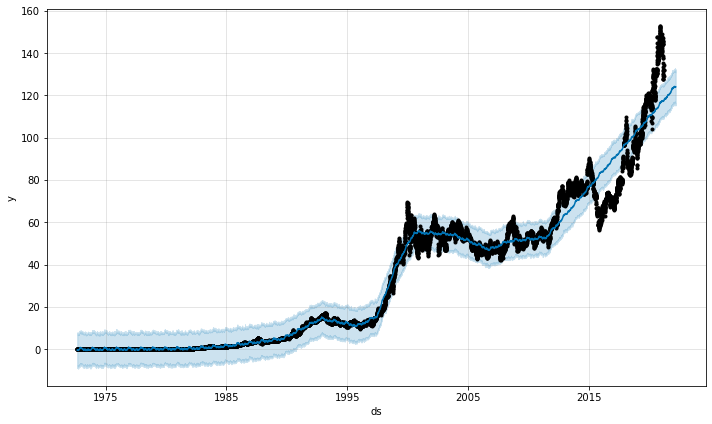

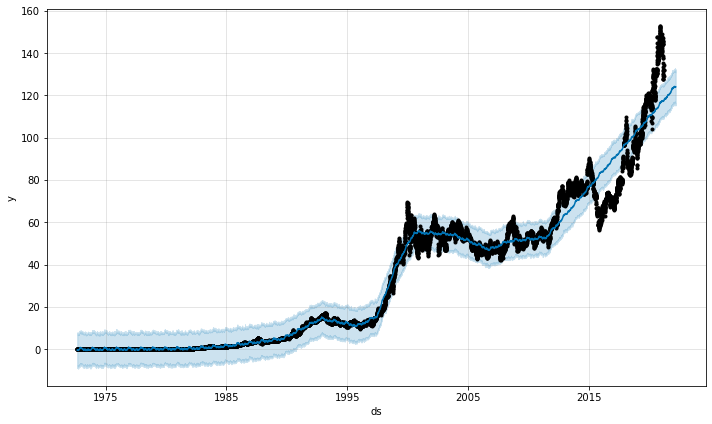

In [15]:
model.plot(predictions)

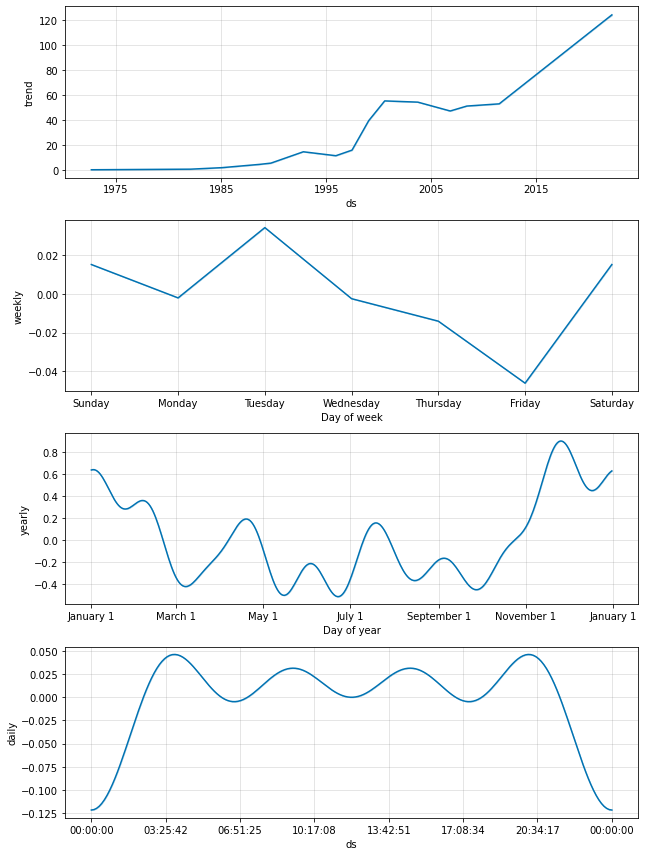

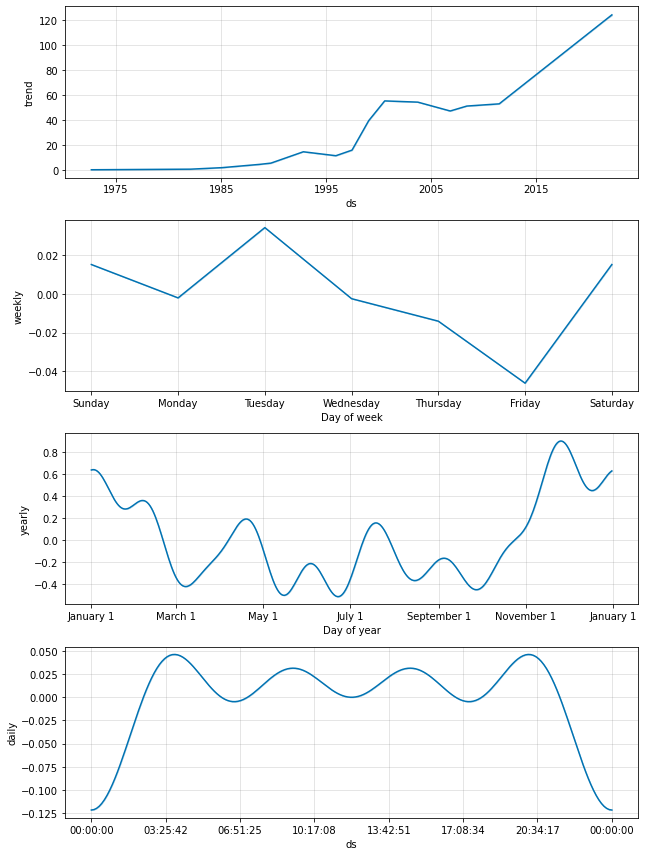

In [16]:
model.plot_components(predictions)